In [1]:
from src.halo_mass_function import HaloMassFunction
from src.halo_merger_rate import HaloMergerRateDensity
from src.bh_merger_rate import BHMergerRateDensity
from src.sgwb import SGWBEnergyDensity
from src.bh_halo_interp import BHhaloInterp
from src.bh_merger_rate_traditional import BHMergerRateDensityTrad

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### Halo mass function

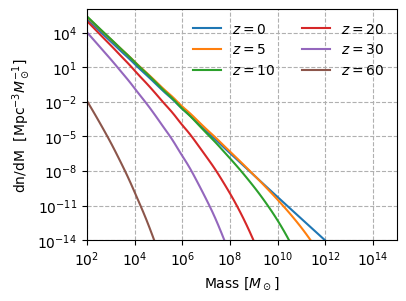

In [23]:
h = 0.674
mass = np.logspace(2, 15, 100)

plt.figure(figsize = (4,3))
for z in [0, 5, 10, 20, 30 , 60]:
    halo = HaloMassFunction(z)
    dn_dm = halo.dndm(mass/ h)
    plt.plot(mass, dn_dm, label = f'$z = {z}$')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e2, 1e15)
plt.ylim(1e-14, 1e6)
# plt.ylim(1e-7, 5e7)
plt.legend(ncol = 2, frameon = False)
# plt.ylabel()

plt.grid(linestyle = '--')
plt.xlabel('Mass [$M_\\odot$]')
plt.ylabel('dn/dM  [Mpc$^{-3} M_\\odot^{-1}$]')
plt.savefig('figures/HaloMassFunction', dpi = 100, bbox_inches='tight')

### Halo merger rate density

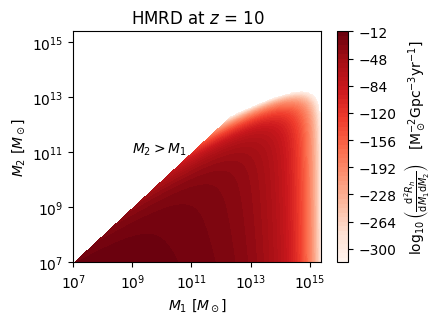

At z = 10, the total merger rate is R_h = 9.0e+01 yr^-1 Gpc^-3


In [35]:
h = 0.674
z = 10.
halo = HaloMassFunction(z)
hmd = HaloMergerRateDensity(halo)

mass1 = np.logspace(7, 15.4, 200)  # Msun
mass2 = np.logspace(7, 15.4, 200)  # Msun
M1_grid, M2_grid = np.meshgrid(mass1, mass2)

# Merger rate density
Rh = hmd.compute_Rh(M1_grid/h, M2_grid/h) # Div by h to set the right input type
if np.any(np.isnan(Rh)):
    print("Array contains NaN values")

plt.figure(figsize=(4,3), dpi = 100)
np.seterr(divide='ignore') # Careful, this is to prevent error msg for the log10(0) but it might suppress other errors too
contour = plt.contourf(M1_grid, M2_grid, np.log10(Rh * 1e9), levels=50, cmap='Reds')
plt.xscale('log')
plt.yscale('log')
plt.colorbar(contour, label=r'$\log_{10} \left( \frac{\mathrm{d}^2 R_h}{\mathrm{d}M_1 \mathrm{d}M_2} \right) \quad [\rm M_\odot^{-2} \rm{Gpc}^{-3} \rm{yr}^{-1}]$')
plt.xlabel(r'$M_1 \ [M_\odot]$')
plt.ylabel(r'$M_2 \ [M_\odot]$')
plt.title(f'HMRD at $z$ = {z:.0f}')
plt.text(1e9, 1e11, '$M_2 > M_1$')
# plt.xlim(1e4, 1e13)
# plt.ylim(1e4, 1e13)
plt.show()

# Integrate over m1 for each m2
integral_m1 = np.trapezoid(Rh * 1e9, x=mass1, axis=1)  # Integrate over m1 for each m2
# Integrate the result over m2
Rh_summed = np.trapezoid(integral_m1, x=mass2)  # Integrate over m2
print(f"At z = {z:.0f}, the total merger rate is R_h = {Rh_summed :.1e} yr^-1 Gpc^-3")

### Fits of black hole - halo mass relation

In [1]:
from src.bh_halo_interp import BHhaloInterp
import numpy as np
from matplotlib import pyplot as plt

BHhaloInterp.clear_cache()
# redshift range
z_vals = np.linspace(1e-2, 6, 10) 
mapping_interp_extended = BHhaloInterp()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed: 73.2min remaining: 109.8min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed: 80.0min remaining: 34.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 108.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  34 out of  40 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.6s finished


In [7]:
mapping_interp_extended = bh_merger_rate_density.BHhalomapping

In [15]:
m = 1e4
print(f"{mapping_interp_extended.M_of_m(m * 1.5, 0, m):.1e}")

4.7e+05


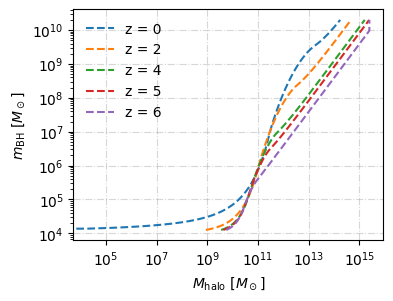

In [11]:
# Mesh for BH masses.
mass1 = np.logspace(4.1, 10.3, 500)  # in solar masses
m1_grid, m2_grid = np.meshgrid(mass1, mass1)
m_seed = 4e5
plt.figure(figsize=(4,3))
for z in [0, 2, 4, 5, 6]:
    # halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = 1e4)
    # plt.loglog(halo_mass_estimated[10], m1_grid[10],  label = f"z = {z}")
    halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = 1e4)
    plt.loglog(halo_mass_estimated[10], m1_grid[10], linestyle = '--', label = f"z = {z}")
    
# plt.xlim(1e7, 1e8)
# plt.ylim(1e5, 2e5)
plt.ylabel("$m_{\\rm BH} \\ [M_\\odot$]")
plt.xlabel("$M_{\\rm halo} \\ [M_\\odot$]")

plt.grid(True, ls="-.", alpha = 0.5)
plt.legend(frameon = False)
plt.show()

# halo_mass_estimated[0]

### $dM/dm$ 

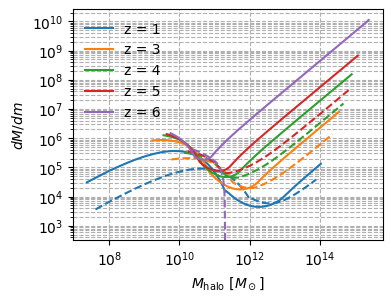

In [9]:
col = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd2']


plt.figure(figsize = (4,3))
mass1 = np.logspace(4, 11, 500)  # in solar masses
for i, z in enumerate([1, 3, 4, 5, 6]):
    mseed = 1e4
    mass1 = np.logspace(np.log10(mseed) + 0.1, 10, 500)  # in solar masses
    m1_grid, m2_grid = np.meshgrid(mass1, mass1)
    halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = mseed)
    slopes = mapping_interp_extended.dM_dm(m1_grid, z_final= z, m_seed = mseed)
    plt.loglog(halo_mass_estimated[10], slopes[10],  label = f"z = {z}", color = col[i])

    mseed = 2e5
    mass1 = np.logspace(np.log10(mseed) + 0.1, 10, 500)  # in solar masses
    m1_grid, m2_grid = np.meshgrid(mass1, mass1)
    halo_mass_estimated = mapping_interp_extended.M_of_m(m1_grid, z_final= z, m_seed = mseed)
    slopes = mapping_interp_extended.dM_dm(m1_grid, z_final= z, m_seed = mseed)
    plt.loglog(halo_mass_estimated[10], slopes[10],  linestyle = '--', color = col[i])

plt.ylabel("$dM/dm$")
plt.xlabel("$M_{\\rm halo} \\ [M_\\odot$]")

plt.grid(True, which="both", ls="--")
plt.legend(frameon = False)
plt.show()

# halo_mass_estimated[0]

### How to calculate halo mass history

In [60]:
from src.halo_mass_history import HaloMassHistory
halo_mass = 1.9e9
z_seed = 10
z_final = 5
hmf_0 = HaloMassFunction(0)
mass_history_model = HaloMassHistory(halo_mass, z_seed, hmf_0)
print(f'A halo of mass M_h = {halo_mass:.2e} Msun at z = {z_seed} evolves to a halo of mass M_h = {mass_history_model.mass_at_z_from_zi(z_final):.2e} Msun at z = {z_final}')

A halo of mass M_h = 1.90e+09 Msun at z = 10 evolves to a halo of mass M_h = 1.91e+11 Msun at z = 5


### SMBH merger rate density

In [1]:
from src.bh_merger_rate import BHMergerRateDensity
from src.sgwb import SGWBEnergyDensity


import numpy as np
import matplotlib.pyplot as plt
# for progress bar in loops
from tqdm.notebook import tqdm

In [2]:
# BHMergerRateDensity.clear_cache()
# BHhaloInterp.clear_cache()

Using pattern: /Users/sohanghodla/.cache/bhmerger/bhmerger_*.pkl
Will delete these files: ['/Users/sohanghodla/.cache/bhmerger/bhmerger_b1871fd109a85e2a417346ffcb315abc.pkl', '/Users/sohanghodla/.cache/bhmerger/bhmerger_c55d35b33a60b96eace99e62fd9c80a9.pkl']


Using previous instance of BHMergerRateDensity; skipping precompute. 
Use BHMergerRateDensity.clear_cache() to recompute - will take 5–15 mins.


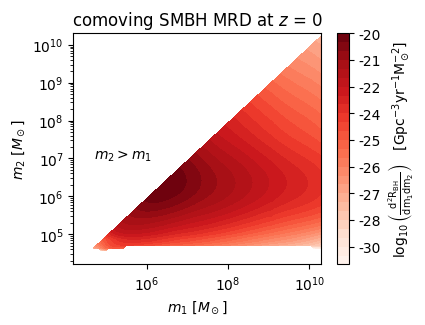

At z = 0, Total merger rate R_BH = 5.7e-06 yr^-1 Gpc^-3


In [ ]:
z = 1e-2
import matplotlib.colors as colors

# black hole masses 
mass1 = np.logspace(4.2, 10.3, 100)  # Msun
mass2 = np.logspace(4.2, 10.3, 100)  # Msun
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

bh_merger_rate_density = BHMergerRateDensity(z, m1_grid, m2_grid)
current_t = bh_merger_rate_density.cosmic_time(z)  # in yr
R_BH = bh_merger_rate_density.compute_R_BH(m1_grid, m2_grid, current_t)

plt.figure(figsize=(4, 3), dpi = 100)

# Careful, this is to prevent error msg for the log10(0) but it might suppress other errors too
with np.errstate(divide='ignore', invalid='ignore'):
    R_BH_log = np.log10(R_BH * 1e9)

contour = plt.contourf(m1_grid, m2_grid, R_BH_log, levels=25, cmap='Reds')

plt.xscale('log')
plt.yscale('log')

plt.colorbar(contour, format='%.0f', label=r'$\log_{10} \left( \frac{\rm {d}^2 R_{\rm {BH}}}{\rm {d}m_1 \rm {d}m_2} \right) \quad [\rm{Gpc}^{-3} \rm{yr}^{-1} M_\odot^{-2}]$')
plt.xlabel(r'$m_1 \ [M_\odot]$')
plt.ylabel(r'$m_2 \ [M_\odot]$')
plt.title(f'comoving SMBH MRD at $z$ = {z:.0f}')
plt.text(5e4, 1e7, '$m_2 > m_1$')
plt.show()

# Integrate over m1 for each m2
integral_m1 = np.trapezoid(R_BH * 1e9, x=mass1, axis=1)  # Integrate over m1 for each m2
# Integrate the result over m2
Rh_BH_summed = np.trapezoid(integral_m1, x=mass2)  # Integrate over m2
print(f"At z = {z:.0f}, Total merger rate R_BH = {Rh_BH_summed :.1e} yr^-1 Gpc^-3")

### source frame SMBH merger rate (in comoving coordiantes)

In [12]:
# Set up redshift and mass grids
z_values = np.linspace(1e-2, 5, 20)
m1 = np.logspace(4.2, 10.3, 100)  # Msun
m2 = np.logspace(4.2, 10.3, 100)  # Msun
m1_grid, m2_grid = np.meshgrid(m1, m2)
total_mass = m1_grid + m2_grid

# Masks
mask_low    = total_mass < 1e6
mask_mid    = (total_mass >= 1e6) & (total_mass < 1e9)
mask_high   = total_mass >= 1e9

R_low  = np.zeros_like(z_values)
R_mid  = np.zeros_like(z_values)
R_high = np.zeros_like(z_values)

# Need to calculate t from z below (defined outside the loop to save unnecessary object initialisation)
bhmrd = BHMergerRateDensity(0, m1_grid, m2_grid)

for i, z in enumerate(tqdm(z_values)):
    t = bhmrd.cosmic_time(z)  # current cosmic time in years
    R_grid = bhmrd.compute_R_BH(m1_grid, m2_grid, t)
    
    # zero out R wherever outside mask
    R1 = R_grid * mask_low
    R2 = R_grid * mask_mid
    R3 = R_grid * mask_high

    # integrate each in m1 then m2
    int_m1_1 = np.trapezoid(R1, x=m1, axis=1)
    int_m1_2 = np.trapezoid(R2, x=m1, axis=1)
    int_m1_3 = np.trapezoid(R3, x=m1, axis=1)

    R_low[i]  = np.trapezoid(int_m1_1, x=m2)
    R_mid[i]  = np.trapezoid(int_m1_2, x=m2)
    R_high[i] = np.trapezoid(int_m1_3, x=m2)

Using previous instance of BHMergerRateDensity; skipping precompute. 
Use BHMergerRateDensity.clear_cache() to recompute - will take 5–15 mins.


  0%|          | 0/20 [00:00<?, ?it/s]

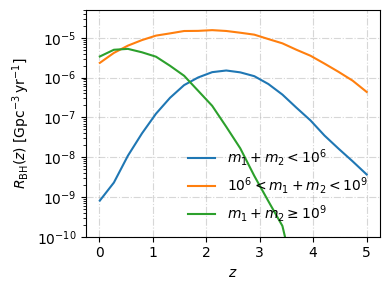

In [31]:
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(4,3))

ax.plot(z_values, R_low   * 1e9, label=r'$m_1 + m_2 < 10^6$',   color=col[0])
ax.plot(z_values, R_mid   * 1e9, label=r'$10^6 < m_1  + m_2 < 10^9$', color=col[1])
ax.plot(z_values, R_high  * 1e9, label=r'$m_1 + m_2 \geq 10^9$',   color=col[2])

ax.set_yscale('log')
ax.set_ylim(1e-10, 5e-1)
ax.set_xlabel('$z$')
ax.set_ylabel(r'$R_{\rm BH}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
ax.grid(ls='-.', alpha = 0.5)

ax.legend(frameon=False, loc='lower right')

ax.set_ylim(None, 5e-5)
plt.tight_layout()
plt.savefig('BH_merger_rates.pdf')
plt.show()

In [2]:
# Set up redshift and mass grids
z_values = np.linspace(1e-2, 6, 20)
m1 = np.logspace(3, 10, 200)  # Msun
m2 = np.logspace(3, 10, 200)  # Msun
m1_grid, m2_grid = np.meshgrid(m1, m2)
total_mass = m1_grid + m2_grid

# Masks
mask_low    = total_mass < 1e6
mask_mid    = (total_mass >= 1e6) & (total_mass < 1e9)
mask_high   = total_mass >= 1e9

R_low_trad  = np.zeros_like(z_values)
R_mid_trad  = np.zeros_like(z_values)
R_high_trad = np.zeros_like(z_values)

# Need to calculate t from z below (defined outside the loop to save unnecessary object initialisation)
bh_merger_rate_density = BHMergerRateDensityTrad(0, m1_grid, m2_grid)

for i, z in enumerate(tqdm(z_values)):
    t = bh_merger_rate_density.cosmic_time(z)  # current cosmic time in years
    R_grid = bh_merger_rate_density.compute_R_BH(m1_grid, m2_grid, t)
    
    # zero out R wherever outside mask
    R1 = R_grid * mask_low
    R2 = R_grid * mask_mid
    R3 = R_grid * mask_high

    # integrate each in m1 then m2
    int_m1_1 = np.trapezoid(R1, x=m1, axis=1)
    int_m1_2 = np.trapezoid(R2, x=m1, axis=1)
    int_m1_3 = np.trapezoid(R3, x=m1, axis=1)

    R_low_trad[i]  = np.trapezoid(int_m1_1, x=m2)
    R_mid_trad[i]  = np.trapezoid(int_m1_2, x=m2)
    R_high_trad[i] = np.trapezoid(int_m1_3, x=m2)

  0%|          | 0/20 [00:00<?, ?it/s]

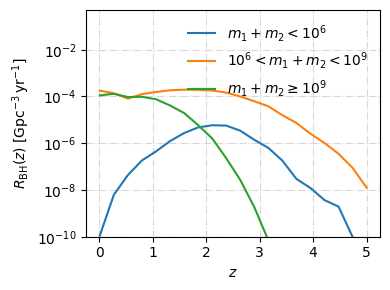

In [5]:
from matplotlib.lines import Line2D

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(4,3))

ax.plot(z_values, R_low   * 1e9, label=r'$m_1 + m_2 < 10^6$',   color=col[0])
ax.plot(z_values, R_mid   * 1e9, label=r'$10^6 < m_1  + m_2 < 10^9$', color=col[1])
ax.plot(z_values, R_high  * 1e9, label=r'$m_1 + m_2 \geq 10^9$',   color=col[2])

ax.set_yscale('log')
ax.set_ylim(1e-10, 5e-1)
ax.set_xlabel('$z$')
ax.set_ylabel(r'$R_{\rm BH}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
ax.grid(ls='-.', alpha = 0.5)

ax.legend(frameon=False, loc='upper right')

plt.tight_layout()
plt.show()


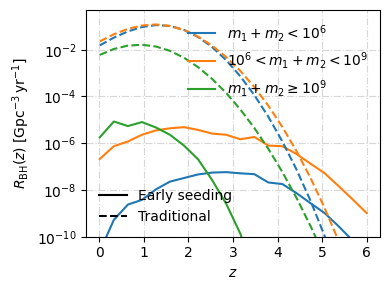

In [4]:
from matplotlib.lines import Line2D

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(4,3))

# 1) Early seeding
ax.plot(z_values, R_low   * 1e9, label=r'$m_1 + m_2 < 10^6$',   color=col[0])
ax.plot(z_values, R_mid   * 1e9, label=r'$10^6 < m_1  + m_2 < 10^9$', color=col[1])
ax.plot(z_values, R_high  * 1e9, label=r'$m_1 + m_2 \geq 10^9$',   color=col[2])

# 2) “traditional” 
ax.plot(z_values, R_low_trad   * 1e9, color=col[0], linestyle='--')
ax.plot(z_values, R_mid_trad   * 1e9, color=col[1], linestyle='--')
ax.plot(z_values, R_high_trad  * 1e9, color=col[2], linestyle='--')

ax.set_yscale('log')
ax.set_ylim(1e-10, 5e-1)
ax.set_xlabel('$z$')
ax.set_ylabel(r'$R_{\rm BH}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
ax.grid(ls='-.', alpha = 0.5)

# first legend: solid lines
leg1 = ax.legend(frameon=False, loc='upper right')

# add it after creating second legend
ax.add_artist(leg1)

# create two proxy artists for the linestyles
linestyle_proxies = [
    Line2D([0], [0], color='black', linestyle='-',  label='Early seeding'),
    Line2D([0], [0], color='black', linestyle='--', label='Traditional'),
]

# second legend: dashed lines
ax.legend(handles=linestyle_proxies, frameon=False, loc='lower left')

plt.tight_layout()
plt.show()


### Stochastic gravitational wave backgroud energy density (normalized with critical density)

Using previous instance of BHhaloInterp. 
Use BHhaloInterp.clear_cache() to recompute - will take 6hrs+.
Cached BHMergerRateDensity to /Users/sohanghodla/.cache/bhmerger/bhmerger_71fb8120b184420ba820aa7d7b413847.pkl


/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Omega_GW_f, _ = quad(integrand, 1e-2, z_max, limit=10)
/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

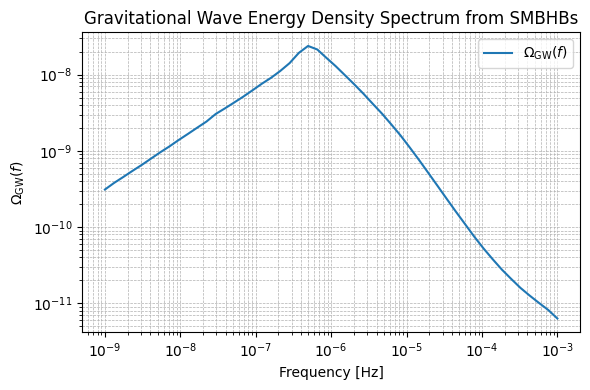

In [2]:
# Define the frequency array [Hz]
f_min = 1e-9  # Hz
f_max = 1e-3   # Hz
num_f = 50 # Number of frequency points
f_vals = np.logspace(np.log10(f_min), np.log10(f_max), num_f)

# Define the maximum redshift for integration
z_max = 5

# Define black hole masses m1 and m2 
mass1 = np.logspace(4.2, 10.3, 300)  # Msun
mass2 = np.logspace(4.2, 10.3, 300)  # Msun

# Create a meshgrid for m1 and m2
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

SGWB_vs_f = SGWBEnergyDensity(m1_grid, m2_grid, mass1, mass2)
# Compute Omega_GW(f) for each frequency
Omega_GW_vals = SGWB_vs_f.compute_Omega_GW(f_vals, z_max)

# ---------------------------------------------------
# Plot Omega_GW(f) vs f
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
plt.loglog(f_vals, Omega_GW_vals, label=r'$\Omega_{\rm GW}(f)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
plt.title('Gravitational Wave Energy Density Spectrum from SMBHBs')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Define the frequency array [Hz]
f_min = 1e-9  # Hz
f_max = 1e-3   # Hz
num_f = 50 # Number of frequency points
f_vals = np.logspace(np.log10(f_min), np.log10(f_max), num_f)

# Define the maximum redshift for integration
z_max = 5

# Define black hole masses m1 and m2 
mass1 = np.logspace(4.2, 10.3, 300)  # Msun
mass2 = np.logspace(4.2, 10.3, 300)  # Msun

# Create a meshgrid for m1 and m2
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

SGWB_vs_f = SGWBEnergyDensity(m1_grid, m2_grid, mass1, mass2)
# Compute Omega_GW(f) for each frequency
Omega_GW_vals = SGWB_vs_f.compute_Omega_GW(f_vals, z_max)

# ---------------------------------------------------
# Plot Omega_GW(f) vs f
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
plt.loglog(f_vals, Omega_GW_vals, label=r'$\Omega_{\rm GW}(f)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
plt.title('Gravitational Wave Energy Density Spectrum from SMBHBs')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Using previous instance of BHhaloInterp. 
Use BHhaloInterp.clear_cache() to recompute - will take 6hrs+.
Cached BHMergerRateDensity to /Users/sohanghodla/.cache/bhmerger/bhmerger_71fb8120b184420ba820aa7d7b413847.pkl


/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Omega_GW_f, _ = quad(integrand, 1e-2, z_max, limit=10)
/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

In [ ]:
# Define the frequency array [Hz]
f_min = 1e-9  # Hz
f_max = 1e-3   # Hz
num_f = 50 # Number of frequency points
f_vals = np.logspace(np.log10(f_min), np.log10(f_max), num_f)

# Define the maximum redshift for integration
z_max = 5

# Define black hole masses m1 and m2 
mass1 = np.logspace(4.2, 10.3, 300)  # Msun
mass2 = np.logspace(4.2, 10.3, 300)  # Msun

# Create a meshgrid for m1 and m2
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

SGWB_vs_f = SGWBEnergyDensity(m1_grid, m2_grid, mass1, mass2)
# Compute Omega_GW(f) for each frequency
Omega_GW_vals = SGWB_vs_f.compute_Omega_GW(f_vals, z_max)

# ---------------------------------------------------
# Plot Omega_GW(f) vs f
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
plt.loglog(f_vals, Omega_GW_vals, label=r'$\Omega_{\rm GW}(f)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
plt.title('Gravitational Wave Energy Density Spectrum from SMBHBs')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Using previous instance of BHhaloInterp. 
Use BHhaloInterp.clear_cache() to recompute - will take 6hrs+.
Cached BHMergerRateDensity to /Users/sohanghodla/.cache/bhmerger/bhmerger_71fb8120b184420ba820aa7d7b413847.pkl


/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Omega_GW_f, _ = quad(integrand, 1e-2, z_max, limit=10)
/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

In [ ]:
# Define the frequency array [Hz]
f_min = 1e-9  # Hz
f_max = 1e-3   # Hz
num_f = 50 # Number of frequency points
f_vals = np.logspace(np.log10(f_min), np.log10(f_max), num_f)

# Define the maximum redshift for integration
z_max = 5

# Define black hole masses m1 and m2 
mass1 = np.logspace(4.2, 10.3, 300)  # Msun
mass2 = np.logspace(4.2, 10.3, 300)  # Msun

# Create a meshgrid for m1 and m2
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

SGWB_vs_f = SGWBEnergyDensity(m1_grid, m2_grid, mass1, mass2)
# Compute Omega_GW(f) for each frequency
Omega_GW_vals = SGWB_vs_f.compute_Omega_GW(f_vals, z_max)

# ---------------------------------------------------
# Plot Omega_GW(f) vs f
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
plt.loglog(f_vals, Omega_GW_vals, label=r'$\Omega_{\rm GW}(f)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
plt.title('Gravitational Wave Energy Density Spectrum from SMBHBs')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Using previous instance of BHhaloInterp. 
Use BHhaloInterp.clear_cache() to recompute - will take 6hrs+.
Cached BHMergerRateDensity to /Users/sohanghodla/.cache/bhmerger/bhmerger_71fb8120b184420ba820aa7d7b413847.pkl


/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Omega_GW_f, _ = quad(integrand, 1e-2, z_max, limit=10)
/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

In [ ]:
# Define the frequency array [Hz]
f_min = 1e-9  # Hz
f_max = 1e-3   # Hz
num_f = 50 # Number of frequency points
f_vals = np.logspace(np.log10(f_min), np.log10(f_max), num_f)

# Define the maximum redshift for integration
z_max = 5

# Define black hole masses m1 and m2 
mass1 = np.logspace(4.2, 10.3, 300)  # Msun
mass2 = np.logspace(4.2, 10.3, 300)  # Msun

# Create a meshgrid for m1 and m2
m1_grid, m2_grid = np.meshgrid(mass1, mass2)

SGWB_vs_f = SGWBEnergyDensity(m1_grid, m2_grid, mass1, mass2)
# Compute Omega_GW(f) for each frequency
Omega_GW_vals = SGWB_vs_f.compute_Omega_GW(f_vals, z_max)

# ---------------------------------------------------
# Plot Omega_GW(f) vs f
# ---------------------------------------------------
plt.figure(figsize=(6, 4))
plt.loglog(f_vals, Omega_GW_vals, label=r'$\Omega_{\rm GW}(f)$')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$\Omega_{\rm GW}(f)$')
plt.title('Gravitational Wave Energy Density Spectrum from SMBHBs')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Using previous instance of BHhaloInterp. 
Use BHhaloInterp.clear_cache() to recompute - will take 6hrs+.
Cached BHMergerRateDensity to /Users/sohanghodla/.cache/bhmerger/bhmerger_71fb8120b184420ba820aa7d7b413847.pkl


/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Omega_GW_f, _ = quad(integrand, 1e-2, z_max, limit=10)
/Users/sohanghodla/Downloads/Dark_stars_PTA/src/sgwb.py:438: IntegrationWarning: The maximum number of subdivisions (10) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calli

### Auxilary function (incase needed)

In [70]:
from scipy.integrate import quad
from src.cosmolopy import constants

# Manual implementation of cosmic time as a function of redshift
def cosmic_time(z):
    """
    Calculate cosmic time at redshift z.

    Parameters:
    - z: Redshift

    Returns:
    - t: Cosmic time in years
    """
    h = 0.674  # Hubble parameter 
    H0 = h * 100 / constants.Mpc_km * constants.yr_s # Hubble constant yr^-1
    omega_m0 = 0.315
    omega_l0 = 0.685

    # Function E(z)
    def E(zp):
        return np.sqrt(omega_l0 +
        (1.0 - omega_l0 - omega_m0) * (1.0 + zp)**2 +
        omega_m0 * (1.0 + zp)**3 )

    # Integrate 
    integrand = lambda zp: 1 / ((1 + zp) * E(zp))
    integral, error = quad(integrand, z, np.inf) # # Integrate from z to a very high redshift ~ infinity
    t = integral / H0 
    return t  # in yrs

z = 10**0.95
print(f"Comoving time at z = {z:.1f} is {cosmic_time(z):.1e} yr")

Comoving time at z = 8.9 is 5.5e+08 yr


### The actual black hole halo relation 

In [5]:

from scipy.interpolate import interp1d, InterpolatedUnivariateSpline, RegularGridInterpolator
 # Define grids
n_z = 300
z_grid = np.logspace(-2.1, 1, n_z)
M_h_grid = np.logspace(2, 20, 2000)
interpolators = []

def stellar_mass_from_halo_mass(M_h, z):
    """ return stellar mass given a halo mass
        Based on arXiv:2001.02230 """
    # Parameters for SHMR evolution
    B = 11.79
    mu = 0.20
    C = 0.046
    nu = -0.38
    D = 0.709
    eta = -0.18
    F = 0.043
    E = 0.96

    # Compute redshift-dependent parameters
    M_A = 10**(B + z * mu)
    A = C * (1 + z)**nu
    gamma = D * (1 + z)**eta
    beta = F * z + E

    # SHMR equation:
    #   M_star = M_h * 2 * A * [ (M_h/M_A)^(-beta) + (M_h/M_A)^(gamma) ]^(-1)
    M_star = M_h * 2 * A * (((M_h / M_A)**(-beta) + (M_h / M_A)**(gamma))**(-1))
    return M_star

def black_hole_mass_from_stellar_mass(M_star):
    """ Return black hole mass for a given stellar mass.
    Based on arXiv:1508.06274 
    """
    return 10**(8.95 + 1.40 * np.log10(M_star / 1e11))

def precompute_M_of_m():
    """For a grid of redshifts, precompute an interpolator that maps
        BH mass -> halo mass."""
    
    # For each redshift, compute the corresponding BH masses for our halo mass grid.
    for z in z_grid:
        # For each halo mass in M_h_grid, compute the stellar mass and then BH mass.
        M_star = stellar_mass_from_halo_mass(M_h_grid, z)
        bh_masses = black_hole_mass_from_stellar_mass(M_star)
        
        # Build a 1D interpolator that inverts the relation: input bh_mass, output halo mass.
        interp_func = InterpolatedUnivariateSpline(bh_masses, M_h_grid, k=3)
        interpolators.append(interp_func)

def M_of_m(m, z):
    """Return the halo mass for a given BH mass array `m` and redshift `z`.
    Here, m can be a 2D meshgrid; we flatten it for interpolation and then reshape."""
    m_flat = m.flatten()
    
    # If z is out of bounds, simply use the nearest available interpolator.
    if z <= z_grid[0]:
        M_h_flat = interpolators[0](m_flat)
    elif z >= z_grid[-1]:
        M_h_flat = interpolators[-1](m_flat)
    else:
        # Find indices in z_grid that bracket the desired z.
        idx = np.searchsorted(z_grid, z)
        z_low = z_grid[idx - 1]
        z_high = z_grid[idx]
        interp_low = interpolators[idx - 1]
        interp_high = interpolators[idx]
    
        # Evaluate the interpolators on the flattened array.
        M_h_low = interp_low(m_flat)
        M_h_high = interp_high(m_flat)
    
        # Linear interpolation in redshift.
        weight = (z - z_low) / (z_high - z_low)
        M_h_flat = M_h_low + weight * (M_h_high - M_h_low)
    
    # Reshape the interpolated halo masses back to the original meshgrid shape.
    return M_h_flat.reshape(m.shape)


def dM_dm(m, M, z, delta=1e-3):
    """
    Numerically compute dM/dm at a given m (which can be an array) and redshift z
    using central finite differences.
    
    Parameters:
        m : The black hole mass (can be 1D or 2D meshgrid).
        z : Redshift
        delta : The small step size for finite differences.
    
    Returns:
        dM_dm : The numerical derivative dM/dm with the same shape as m.
    """
    # Can also use spline derivative
    
    M_plus = M_of_m(m + delta, z)
    M_minus = M_of_m(m - delta, z)
    
    # Central difference derivative
    dM_dm_val = (M_plus - M_minus) / (2 * delta)
    
    return dM_dm_val

In [6]:
precompute_M_of_m()

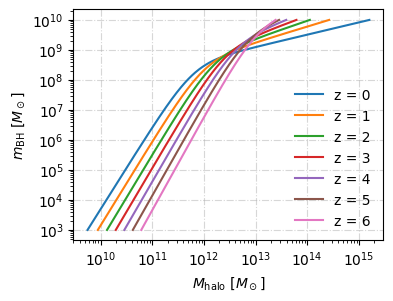

In [10]:
# Mesh for BH masses.
mass1 = np.logspace(3, 10, 500)  # in solar masses
m1_grid, m2_grid = np.meshgrid(mass1, mass1)

plt.figure(figsize=(4,3))
for z in [0, 1, 2, 3, 4, 5, 6]:
    halo_mass_estimated = M_of_m(m1_grid, z)
    plt.loglog(halo_mass_estimated[10], m1_grid[10],  label = f"z = {z}")
    
plt.ylabel("$m_{\\rm BH} \\ [M_\\odot$]")
plt.xlabel("$M_{\\rm halo} \\ [M_\\odot$]")

plt.grid(True, ls="-.", alpha = 0.5)
plt.legend(frameon = False)
plt.show()

# halo_mass_estimated[0]

In [9]:
from scipy.stats import lognorm
from scipy.interpolate import interp1d
def p_merg(tau0=1.0, sigma=0.5):
        """
        Returns a 1/yr PDF for the delay-time τ (in Gyr) between halo merger
        and BH merger, assuming a log-normal distribution whose *mean* is tau0.

        Parameters:
        -----------
        tau0 : float
            Mean merger delay time [Gyr].
        sigma : float
            Standard deviation of ln(τ) (i.e. log-space scatter).
        
        Objective:
            creates self.p_merg_interp(τ) with p(τ) in [1/yr].
        """

        # numerical grid parameters
        tau_min = 1e-4           # avoid τ=0
        tau_max = 14.0           # upper end for grid (can be extended)
        num_pts = 1000

        # tau-grid (in Gyr)
        tau_grid = np.linspace(tau_min, tau_max, num_pts)

        # Compute the log-normal mu so that mean = tau0:
        #    E[tau] = exp(mu + 0.5*sigma^2) = tau0  ->  mu = ln(tau0) - 0.5*sigma^2
        mu = np.log(tau0) - 0.5 * sigma**2

        # evaluate the log-normal PDF [per Gyr]
        pdf_per_gyr = lognorm.pdf(
            tau_grid,
            s=sigma,
            scale=np.exp(mu),
        )

        # Convert to per-year
        pdf_per_year = pdf_per_gyr / 1e9

        # Interpolator
        p_merg_interp = interp1d(
            tau_grid,
            pdf_per_year,
            kind='linear',
            bounds_error=False,
            fill_value=0.0, # zero outside the grid
        )
        return p_merg_interp

In [7]:
np.logspace(4, 5.7, 10)

array([ 10000.        ,  15448.59147903,  23865.89786859,  36869.4506452 ,
        56958.10810738,  87992.25435691, 135935.63908785, 210001.41557087,
       324422.60791716, 501187.23362727])

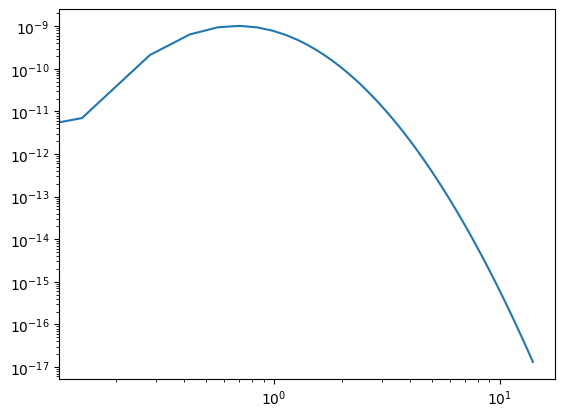

In [12]:
t = np.linspace(0, 14, 100)
p_merg_interp = p_merg()
plt.loglog(t, p_merg_interp(t))
# plt.yscale('log')

In [21]:
from scipy.stats import truncnorm

def mass_seed(m_low: float,
              m_high: float,
              mean_log: float,
              sigma_dex: float = 1/3):
    """
    Sample a single seed-BH mass *in log10(Msun)* from a truncated Normal.

    We assume X = log10(M) ~ N(mean_log, sigma_dex^2), truncated to
    [m_low, m_high], all in dex.  Returns one sample of X.
    """

    mu    = mean_log
    sigma = sigma_dex

    # standardize the truncation limits
    a = (m_low  - mu) / sigma
    b = (m_high - mu) / sigma

    # draw one sample of X = log10(M)
    x_sample = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=1)

    return 10**x_sample.item()  


In [25]:
mass_seed(4, 10, 5)

130013.27694531051

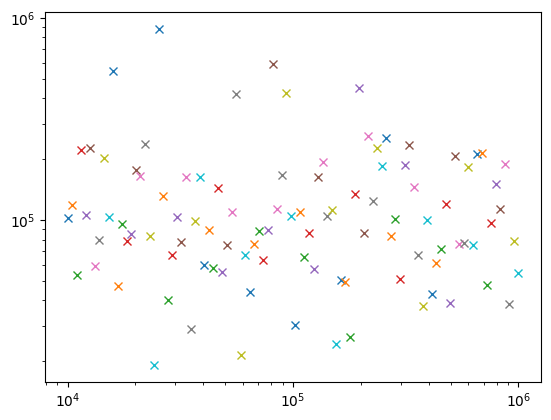

In [28]:
mass = np.logspace(4, 6, 100)
for m in mass:
    plt.loglog(m, mass_seed(4, 10, 5), marker = 'x')

In [ ]:
from scipy.stats import truncnorm

def sample_delay_log(log_tau_min: float,
                     log_tau_max: float,
                     mean_log_tau: float,
                     sigma_dex: float = 0.5) -> float:
    """
    Sample one merger–delay time *in log10(Gyr)* from a truncated Normal:
    
      X = log10(tau/Gyr)
      X ~ N(mean_log_tau, sigma_dex^2), truncated to [log_tau_min, log_tau_max]
    
    Parameters
    ----------
    log_tau_min : float
        Lower bound on log10(delay/Gyr).
    log_tau_max : float
        Upper bound on log10(delay/Gyr).
    mean_log_tau : float
        Desired *mean* of X = log10(delay/Gyr).
    sigma_dex : float, optional
        Standard deviation in dex (default 0.5 dex).

    Returns
    -------
    X : float
        A single sample of log10(delay/Gyr).
    """

    mu    = mean_log_tau
    sigma = sigma_dex

    # standardize bounds
    a = (log_tau_min - mu) / sigma
    b = (log_tau_max - mu) / sigma

    # draw one truncated-normal sample in log-space
    x_sample = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=1)

    return float(x_sample)  # log10(delay/Gyr)
